#### Student Alcohol Consumption
## Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('student-mat.csv')

## Data Preparation- data cleaning and transformations

In [3]:
#Rows tell you the number of obs and columns tell you the number of features
print('Rows and Columns :', df.shape,'\n' ) 

#Running info on the dataset to check on the any visible missing values and datatypes
print('INFO:')
print(df.info(), '\n')

# Checking for the number of unique values in each column in dataset
print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (395, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     3

In [4]:
pd.set_option("display.max_columns", None) #show all n columns in the display
df.head() #preview of first five observation

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
# checking the various values in the Mjob variable
df['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [6]:
# checking the various values in the Fjob variable
df['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [7]:
# checking the various values in the failures variable
df['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [8]:
# Converting all binary non-numeric variables to numeric variables to allow for easy data processing

df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0


In [9]:
# checking to see if the binary conversion to numeric binary worked
df['romantic'].value_counts()

0    263
1    132
Name: romantic, dtype: int64

In [10]:
# looking at first 5 rows preview to check to see if the binary conversion to numeric binary worked
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,0,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,0,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,0,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,0,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [11]:
#checking the various values in the reason variable
df['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

Binning all nominal variables to numeric bins

In [12]:
# Converting all nominal non-numeric variables to numeric variables to allow for easy data processing

conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)


In [13]:
#Checking to ensure numeric conversion worked
df['Mjob'].value_counts()

5    141
2    103
1     59
3     58
4     34
Name: Mjob, dtype: int64

In [14]:
#checking for datadtypes. We want all numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    int32 
 9   Fjob        395 non-null    int32 
 10  reason      395 non-null    int32 
 11  guardian    395 non-null    int32 
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob           int32
Fjob           int32
reason         int32
guardian       int32
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [16]:
# Combining the 'alcohol' variable 
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     150
3      66
4      60
5      45
6      35
7      17
10      9
8       9
9       4
Name: week_alc, dtype: int64

0    321
1     74
Name: alc, dtype: int64
0    0.812658
1    0.187342
Name: alc, dtype: float64


Text(0.5, 1.0, 'Distribution of Heavy Drinkers VS Light drinkers')

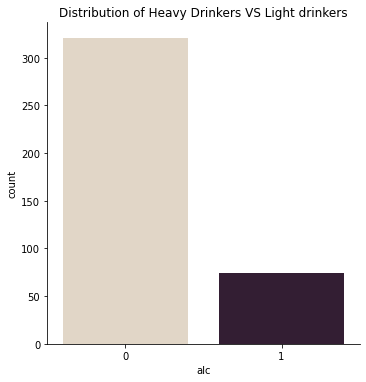

In [17]:
# defining the target variable 
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
plt.title('Distribution of Heavy Drinkers VS Light drinkers')

In [18]:
# checking for Nan values
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
week_alc      False
alc           False
dtype: bool

In [19]:
# correlation with binary alcohol variable
df.corrwith(df['alc'])

age           0.104272
Medu         -0.032361
Fedu         -0.045327
Mjob          0.039249
Fjob         -0.006156
reason        0.072331
guardian      0.022586
traveltime    0.128910
studytime    -0.221568
failures      0.203295
famrel       -0.049836
freetime      0.166353
goout         0.367312
Dalc          0.761469
Walc          0.723634
health        0.102670
absences      0.102723
G1           -0.141423
G2           -0.108515
G3           -0.074763
week_alc      0.811452
alc           1.000000
dtype: float64

In [20]:
# checking correlation with continuous alcohol variable
df.corrwith(df['week_alc'])

age           0.134972
Medu         -0.021681
Fedu         -0.007127
Mjob         -0.007015
Fjob         -0.016060
reason        0.074868
guardian     -0.029111
traveltime    0.149134
studytime    -0.252698
failures      0.153203
famrel       -0.108427
freetime      0.189754
goout         0.392683
Dalc          0.869140
Walc          0.939680
health        0.094662
absences      0.138687
G1           -0.124158
G2           -0.083901
G3           -0.058245
week_alc      1.000000
alc           0.811452
dtype: float64

**Note:** How can you use this info during the modeling phase? Can you perform any variable significance to check this, for values only upto 18 years, or also more?

In [21]:
df[df['age'] >=19]['age'].count()

29

In [22]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
0,1,1,18,0,1,0,4,4,1,3,3,2,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,2,0
1,1,1,17,0,1,1,1,1,1,5,3,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,2,0
2,1,1,15,0,0,1,1,1,1,5,4,2,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,5,0
3,1,1,15,0,1,1,4,2,4,2,1,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,2,0
4,1,1,16,0,1,1,3,3,5,5,1,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,3,0


In [23]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'week_alc', 'alc'],
      dtype='object')

In [24]:
pca_feats = ['age','Medu', 'Fedu',
        'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3']
len(pca_feats)

14

In [25]:
pca_cont = ['age','G1', 'G2', 'G3', 'absences']

In [26]:
# pca_feats2=['school', 'sex', 'address','famsize','Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
#        'higher', 'internet', 'romantic', 'Mjob', 'Fjob', 'reason', 'guardian' ]
# len(pca_feats2)

In [27]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:,pca_feats].values
a = df.loc[:,pca_cont].values
# x2 = df.loc[:,pca_feats2].values

In [28]:
x = StandardScaler().fit_transform(x)
a= StandardScaler().fit_transform(a)
# x2 = StandardScaler().fit_transform(x2)

In [29]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'pricipal component 7', 
                                      'pricipal component 8',
                                     'pricipal component 9',
                                      'pricipal component 10',
                                     'pricipal component 11',
                                     'pricipal component 12',
                                     'pricipal component 13',
                                     'principal component 14'])
pca_c = PCA()
principalcomponents1 = pca_c.fit_transform(a)
principalDf1 = pd.DataFrame(data= principalcomponents1, 
                           columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

# pca2 = PCA()
# principalComponents = pca2.fit_transform(x2)
# principalDf = pd.DataFrame(data = principalComponents, 
#                            columns = ['principal component 1', 
#                                       'principal component 2',
#                                       'principal component 3',
#                                       'principal component 4',
#                                       'principal component 5',
#                                       'principal component 6',
#                                       'pricipal component 7', 
#                                       'pricipal component 8',
#                                      'pricipal component 9',
#                                       'pricipal component 10',
#                                      'pricipal component 11',
#                                      'pricipal component 12',
#                                      'pricipal component 13',
#                                      'pricipal component 14',
#                                      'pricipal component 15',
#                                      'pricipal component 16',
#                                      'pricipal component 17'])

In [30]:
print(pca.explained_variance_)
# print(pca2.explained_variance_)

[3.29686765 1.59659976 1.39508344 1.24547665 1.08690751 1.00519529
 0.92936422 0.81830509 0.75942927 0.65174398 0.62137583 0.36062709
 0.18797386 0.08058337]


In [31]:
pca_feats

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [32]:
# pca.explained_variance_ratio_
# print(pca2.explained_variance_ratio_)
pca_c.explained_variance_ratio_

array([0.54672643, 0.2319951 , 0.16487048, 0.03930647, 0.01710152])

In [33]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)
# eig_values2 = pca2.explained_variance_
# eig_vectors2 = pca2.components_
eig_values1 = pca_c.explained_variance_
eig_vectors1 = pca_c.components_

[3.29686765 1.59659976 1.39508344 1.24547665 1.08690751 1.00519529
 0.92936422 0.81830509 0.75942927 0.65174398 0.62137583 0.36062709
 0.18797386 0.08058337]
[[ 1.57432646e-01 -2.52190496e-01 -2.28469309e-01  1.36635547e-01
  -1.28105597e-01  3.19732231e-01 -8.90415826e-03  3.25805997e-02
   1.17921005e-01  6.25235662e-02  1.70740502e-02 -4.73534742e-01
  -4.95263953e-01 -4.83052044e-01]
 [-1.48544417e-01  5.62148356e-01  5.74903520e-01 -1.98512098e-01
  -1.22690840e-01 -6.42814177e-02  6.20636758e-02  2.06159496e-01
   3.15897592e-01  9.35519042e-02  8.98064148e-02 -1.91314419e-01
  -2.01792670e-01 -1.80371737e-01]
 [-2.80446039e-01  1.07839713e-01  1.49951170e-01 -7.28646077e-02
   2.12884265e-01 -1.88573600e-01 -3.49012408e-01 -6.00360707e-01
  -4.38017957e-01 -1.10121915e-01 -5.27061805e-02 -1.96949877e-01
  -1.68439434e-01 -2.11844407e-01]
 [ 4.98656052e-01  1.44714142e-01  5.62434724e-02 -1.00314851e-02
   7.29514916e-03  1.60382518e-01 -2.73501238e-01 -1.97600987e-01
   1.215005

In [34]:
eig_vectors[0]

array([ 0.15743265, -0.2521905 , -0.22846931,  0.13663555, -0.1281056 ,
        0.31973223, -0.00890416,  0.0325806 ,  0.117921  ,  0.06252357,
        0.01707405, -0.47353474, -0.49526395, -0.48305204])

In [35]:
pc1 = pca.components_[0]
pc2= pca.components_[1]
print(pc1)
print(pc2)

# pc21 = pca2.components_[0]
# pc22= pca2.components_[1]
pc_cont1 = pca_c.components_[0]
pc_cont2 = pca_c.components_[1]

[ 0.15743265 -0.2521905  -0.22846931  0.13663555 -0.1281056   0.31973223
 -0.00890416  0.0325806   0.117921    0.06252357  0.01707405 -0.47353474
 -0.49526395 -0.48305204]
[-0.14854442  0.56214836  0.57490352 -0.1985121  -0.12269084 -0.06428142
  0.06206368  0.2061595   0.31589759  0.0935519   0.08980641 -0.19131442
 -0.20179267 -0.18037174]


In [36]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=pca_feats)
str_loading_1.sort_values(ascending=False)
# describes student's performance, bad performing student

failures      0.580547
age           0.285855
traveltime    0.248093
goout         0.214112
health        0.113526
freetime      0.059158
absences      0.031002
famrel       -0.016168
studytime    -0.232605
Fedu         -0.414838
Medu         -0.457909
G1           -0.859810
G3           -0.877091
G2           -0.899265
dtype: float64

In [37]:
structure_loading_2 = pc_cont1 * np.sqrt(eig_values1[0])
strt_loading_2 = pd.Series(structure_loading_2, index = pca_cont)
strt_loading_2.sort_values(ascending=False)

age         0.206636
absences    0.036371
G1         -0.924049
G3         -0.951211
G2         -0.968442
dtype: float64

In [38]:
structure_loading_2 = pc_cont2 * np.sqrt(eig_values1[1])
strt_loading_2 = pd.Series(structure_loading_2, index = pca_cont)
strt_loading_2.sort_values(ascending=False)

absences    0.787606
age         0.727494
G1          0.086354
G3          0.067988
G2          0.035631
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

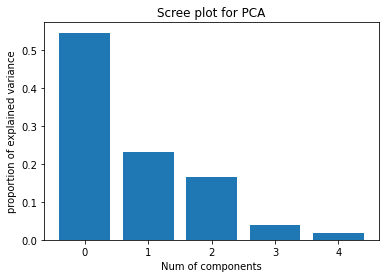

In [39]:
index = np.arange(5)
plt.bar(index, pca_c.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
# plt.xticks(ticks=list(range(1,6)))
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'proportion of explained variance')

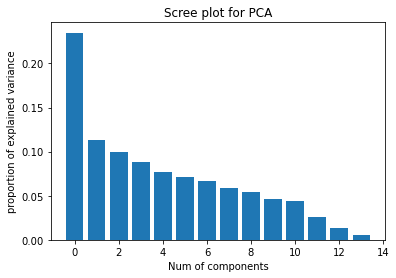

In [40]:
index = np.arange(14)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
# plt.xticks(ticks=list(range(1,15)))
plt.ylabel('proportion of explained variance')

In [41]:
# structure_loading_2 = pc21* np.sqrt(eig_values2[0])
# str_loading_2 = pd.Series(structure_loading_2, index=pca_feats2)
# str_loading_2.sort_values(ascending=False)

In [42]:
# get the loadings
structure_loading_1 = pc2* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=pca_feats)
str_loading_1.sort_values(ascending=False)

Fedu          1.043868
Medu          1.020708
goout         0.573584
freetime      0.374330
health        0.169865
absences      0.163064
famrel        0.112691
failures     -0.116718
studytime    -0.222773
age          -0.269716
G3           -0.327506
G1           -0.347375
traveltime   -0.360444
G2           -0.366401
dtype: float64

### Var 1: school


In [43]:
# Running descriptive analysis 
print("Descriptive Statistics :", '\n', df['school'].describe())

# To check correlation to alcohol consumption levels
print("Correlation with weekly alcohol consumption :", '\n', df['school'].corr(df['week_alc']))
print("Correlation with target var alc consumption :", '\n', df['school'].corr(df['alc']))

# Looking at proportions of values in the attribute
print("Number of Students at GP(1) :", df['school'].sum())
print("Number of Students at MS(0) :", df['school'].count() - df['school'].sum())
print("percentage of data distrib :", '\n', df.school.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="school", data=df,  ax = ax[0])
fig.suptitle('Distribution of Students between schools and relation to alcohol usage')
sns.barplot(x="school", y = 'week_alc', data=df,  ax = ax[1], )

df.groupby(by= 'school').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      349
Name: school, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

In [44]:
# distribution and relation between the sex of the student and the school they go to
fig, ax = plt.figure()
fig.suptitle('Comparison of alcohol usage by sex on the schools they go to')
sns.catplot(x="school", y="week_alc", hue="sex", kind="bar", data=df)


TypeError: cannot unpack non-iterable Figure object

<Figure size 432x288 with 0 Axes>

Male students at MS have a higher alcohol consumption value than male students who go to GP whereas female students at MS have a lower alcohol consumption value than those who go to GP.

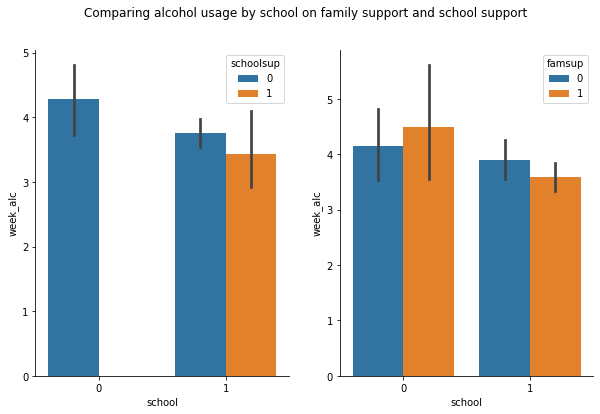

In [45]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
fig.suptitle('Comparing alcohol usage by school on family support and school support')
sns.barplot(x="school", y="week_alc", hue="schoolsup", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="school", y="week_alc", hue="famsup", data=df, orient = 'v', ax = ax[1]);

* In total more students at MS receive extra educational support from school

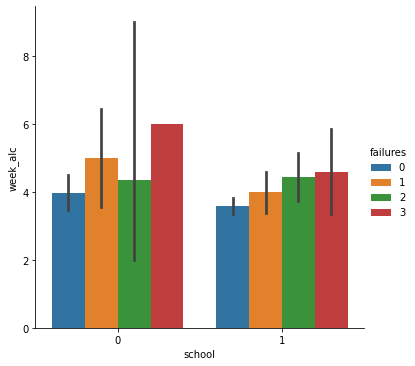

In [46]:
sns.catplot(x="school", y="week_alc", hue="failures", kind="bar", data=df)


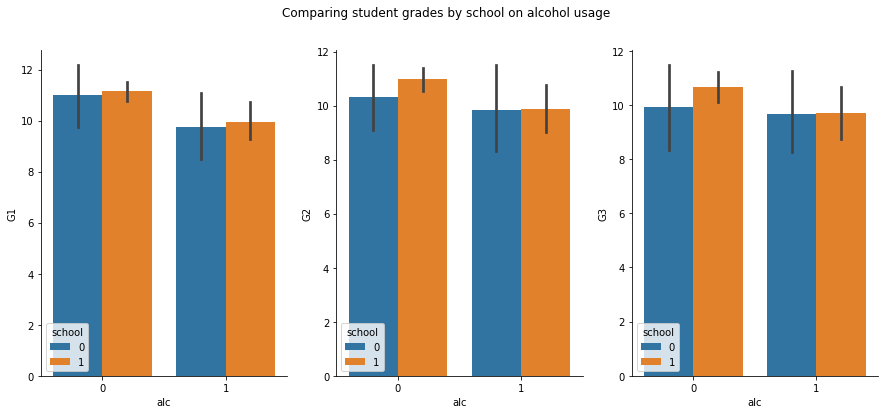

In [47]:
fig, ax = plt.subplots(1, 3, figsize= (15,6))
sns.despine(right=True)
fig.suptitle('Comparing student grades by school on alcohol usage')
sns.barplot(x="alc", y="G1", hue="school", data=df,  ax = ax[0])
sns.barplot(x="alc", y="G2", hue="school", data=df, ax = ax[1])
sns.barplot(x="alc", y="G3", hue="school", data=df,  ax = ax[2]);


* For all students regardless of alcohol consumption, students at GP get higher grades than students at MS

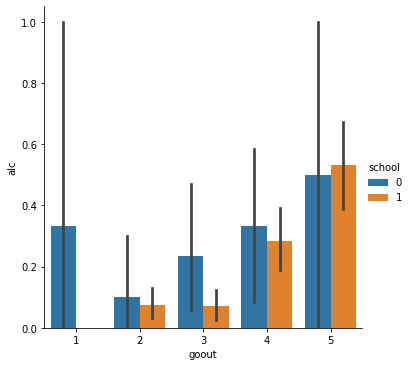

In [48]:
sns.catplot(x="goout", y="alc", hue="school", kind="bar", data=df)

* There is a strong correlation of students who go out often and how much alcohol they consume. 

### Var 2: sex
**Gender of student**

In [49]:
print("Descriptive Statistics :", '\n', df['sex'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['sex'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['sex'].corr(df['alc']))
print("Number of Female Students (1) :", df['sex'].sum())
print("Number of Male Students (0) :", df['sex'].count() - df['sex'].sum())
print("percentage of data distrib :", '\n', df.sex.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
fig.suptitle('Comparing student grades by school on alcohol usage')
sns.countplot(x="sex", data=df,  ax = ax[0])
sns.barplot(x="sex", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'sex').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      208
Name: sex, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

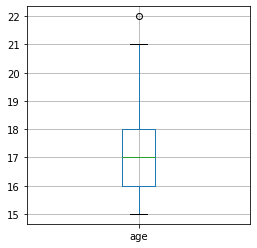

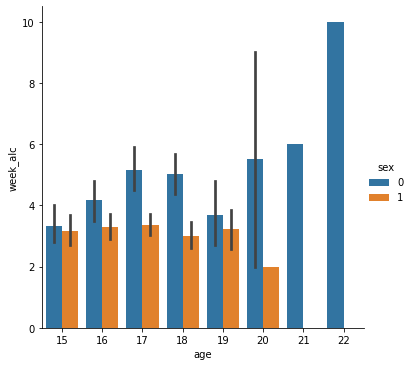

In [50]:
df.boxplot('age',figsize=(4,4))
sns.catplot(x="age", y="week_alc", hue="sex", kind="bar", data=df)
df['age'].value_counts()

### Var 3: age
**Age of student**

Descriptive Statistics : 
 count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Correlation with weekly alcohol consumption : 
 0.13497227369510825
Correlation with target alc consumption : 
 0.10427213624008347
Proportion of categories : 
 16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
percentage of data distrib : 
 16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64


,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
age,,,,,,,,,,,,,,,,,,,,,
15,3.036585,2.756098,3.207317,3.670732,2.317073,1.743902,1.365854,2.158537,0.268293,4.000000,3.280488,2.743902,1.353659,1.902439,3.585366,3.341463,11.231707,11.365854,11.256098,3.256098,0.121951
16,2.826923,2.576923,3.432692,3.971154,2.221154,1.798077,1.403846,1.875000,0.230769,3.836538,3.230769,3.173077,1.432692,2.278846,3.701923,5.451923,10.942308,11.182692,11.028846,3.711538,0.192308
17,2.612245,2.469388,3.142857,3.744898,2.295918,1.755102,1.459184,2.020408,0.244898,3.908163,3.224490,3.204082,1.520408,2.571429,3.500000,6.459184,10.897959,10.479592,10.275510,4.091837,0.193878
18,2.707317,2.475610,3.170732,3.780488,2.317073,1.853659,1.585366,2.146341,0.292683,4.024390,3.121951,3.304878,1.548780,2.414634,3.439024,6.048780,10.719512,10.134146,9.548780,3.963415,0.219512
19,2.166667,2.041667,3.208333,3.166667,1.916667,2.666667,1.458333,2.083333,1.166667,3.875000,3.250000,2.916667,1.458333,1.958333,3.500000,10.458333,10.250000,9.250000,8.208333,3.416667,0.166667
20,3.000000,2.000000,2.666667,4.000000,3.000000,3.000000,1.333333,2.000000,1.333333,5.000000,4.666667,3.333333,2.000000,2.333333,4.000000,5.000000,13.666667,13.666667,14.000000,4.333333,0.333333
21,1.000000,1.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,8.000000,7.000000,6.000000,1.000000
22,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,16.000000,6.000000,8.000000,8.000000,10.000000,1.000000


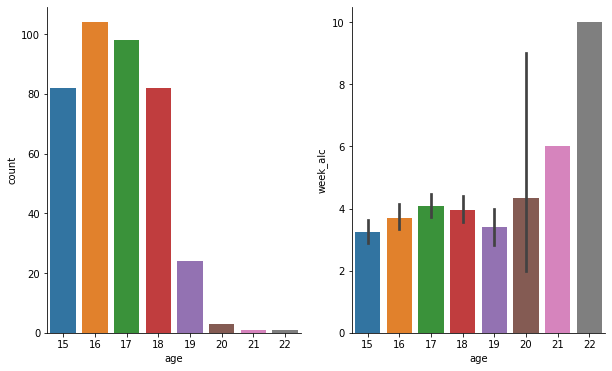

In [51]:
print("Descriptive Statistics :", '\n', df['age'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['age'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['age'].corr(df['alc']))
print("Proportion of categories :", '\n', df.age.value_counts())
print("percentage of data distrib :", '\n', df.age.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="age", data=df,  ax = ax[0])
sns.barplot(x="age", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'age').mean()

* Only 1 student at age 22 and has a very high alcohol consumption level. 2 values at 21 age but their alcohol consumption is only a little higher than the avg high school student. 
* The 22 year old student might be skewing the distribution to the right. **Removing this outlier**

### Var 4: address
**Student's home address setting- Urban or Rural**

In [52]:
print("Descriptive Statistics :", '\n', df['address'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['address'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['address'].corr(df['alc']))
print("Number of Rural Students (1) :", df['address'].sum())
print("Number of Urban Students (0) :", df['address'].count() - df['address'].sum())
print("percentage of data distrib :", '\n', df.address.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="address", data=df,  ax = ax[0])
sns.barplot(x="address", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'address').mean()

Descriptive Statistics : 
 count     395
unique      2
top         0
freq      307
Name: address, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 5: famsize
**Student's family size - Less Than 3 or Greater than 3

In [53]:
print("Descriptive Statistics :", '\n', df['famsize'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['famsize'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['famsize'].corr(df['alc']))
print("Number of Students with famsize of >3 (1) :", df['famsize'].sum())
print("Number of Students with famsize of <3 (0) :", df['famsize'].count() - df['famsize'].sum())
print("percentage of data distrib :", '\n', df.famsize.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="famsize", data=df,  ax = ax[0])
sns.barplot(x="famsize", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'famsize').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      281
Name: famsize, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 6: Pstatus
**Student's parents cohabitation status- live together or apart

In [54]:
print("Descriptive Statistics :", '\n', df['Pstatus'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Pstatus'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Pstatus'].corr(df['alc']))
print("# of Students whose parents live together(1) :", df['Pstatus'].sum())
print("# of Students whose parents live apart(0) :", df['Pstatus'].count() - df['Pstatus'].sum())
print("percentage of data distrib :", '\n', df.Pstatus.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Pstatus", data=df,  ax = ax[0])
sns.barplot(x="Pstatus", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Pstatus').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      354
Name: Pstatus, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 7: Medu 
**Student's mother's education level**
* 0 - none
* 1 - primary education (4th grade)
* 2 - 5th to 9th grade
* 3 - secondary education 
* 4 - higher education

Descriptive Statistics : 
 count    395.000000
mean       2.749367
std        1.094735
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.021680770118500677
Correlation with target alc consumption : 
 -0.03236097551352787
Proportion of categories : 
 4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
percentage of data distrib : 
 4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64


,age,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Medu,,,,,,,,,,,,,,,,,,,,,
0,17.333333,1.666667,2.333333,3.666667,2.666667,2.000000,1.333333,2.000000,1.000000,3.333333,3.333333,2.333333,1.666667,2.666667,4.000000,0.666667,12.000000,12.666667,13.000000,4.333333,0.333333
1,17.101695,1.457627,3.033898,3.661017,2.389831,1.898305,1.711864,1.813559,0.677966,3.881356,3.135593,3.067797,1.525424,2.525424,3.559322,3.932203,9.745763,9.169492,8.677966,4.050847,0.254237
2,16.708738,2.029126,3.194175,3.854369,2.320388,1.825243,1.504854,2.087379,0.320388,4.000000,3.233010,3.009709,1.349515,2.135922,3.660194,4.873786,10.563107,10.359223,9.728155,3.485437,0.135922
3,16.777778,2.595960,3.353535,3.959596,2.080808,1.868687,1.393939,2.090909,0.434343,4.030303,3.272727,3.171717,1.575758,2.414141,3.555556,7.737374,10.606061,10.444444,10.303030,3.989899,0.212121
4,16.427481,3.351145,3.305344,3.587786,2.320611,1.839695,1.328244,2.053435,0.099237,3.877863,3.251908,3.175573,1.488550,2.206107,3.458015,5.748092,11.908397,11.847328,11.763359,3.694656,0.175573


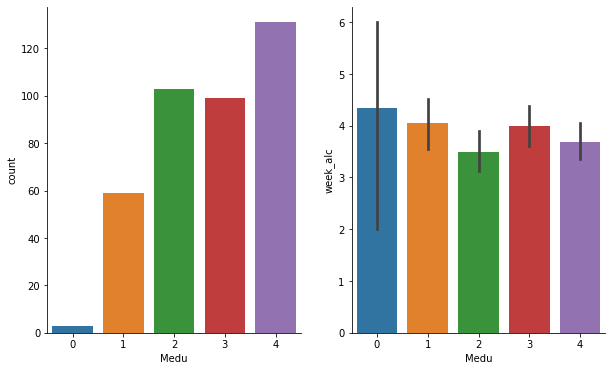

In [55]:
print("Descriptive Statistics :", '\n', df['Medu'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Medu'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Medu'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Medu.value_counts())
print("percentage of data distrib :", '\n', df.Medu.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Medu", data=df,  ax = ax[0])
sns.barplot(x="Medu", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Medu').mean()

### Var 8: Fedu 
**Student's father's education level**
* 0 - none
* 1 - primary education (4th grade)
* 2 - 5th to 9th grade
* 3 - secondary education 
* 4 - higher education

Descriptive Statistics : 
 count    395.000000
mean       2.521519
std        1.088201
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.007126501283078681
Correlation with target alc consumption : 
 -0.045326531973137366
Proportion of categories : 
 2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
percentage of data distrib : 
 2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64


,age,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Fedu,,,,,,,,,,,,,,,,,,,,,
0,15.500000,2.500000,4.000000,5.000000,2.500000,2.000000,2.000000,3.000000,0.000000,3.500000,3.500000,2.500000,1.000000,1.000000,2.000000,5.000000,12.000000,13.000000,13.000000,2.000000,0.000000
1,17.158537,1.731707,3.182927,4.073171,2.414634,1.963415,1.719512,1.951220,0.707317,3.963415,3.243902,3.109756,1.524390,2.378049,3.743902,5.048780,9.731707,9.390244,9.158537,3.902439,0.231707
2,16.643478,2.408696,3.286957,3.773913,2.200000,1.886957,1.400000,2.069565,0.347826,3.904348,3.278261,3.034783,1.521739,2.286957,3.478261,5.756522,11.026087,10.878261,10.260870,3.808696,0.200000
3,16.670000,3.130000,3.460000,3.780000,2.150000,1.800000,1.320000,2.120000,0.210000,4.030000,3.150000,3.120000,1.310000,2.260000,3.300000,6.440000,10.740000,10.750000,10.660000,3.570000,0.140000
4,16.416667,3.635417,2.989583,3.437500,2.364583,1.770833,1.395833,1.958333,0.135417,3.895833,3.260417,3.197917,1.583333,2.281250,3.781250,5.468750,11.927083,11.562500,11.364583,3.864583,0.187500


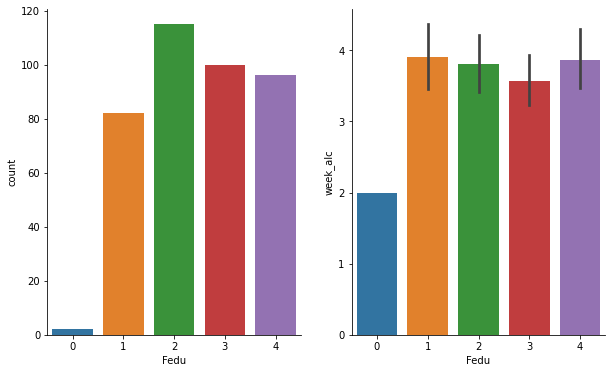

In [56]:
print("Descriptive Statistics :", '\n', df['Fedu'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Fedu'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Fedu'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Fedu.value_counts())
print("percentage of data distrib :", '\n', df.Fedu.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Fedu", data=df,  ax = ax[0])
sns.barplot(x="Fedu", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Fedu').mean()

<AxesSubplot:xlabel='sex', ylabel='week_alc'>

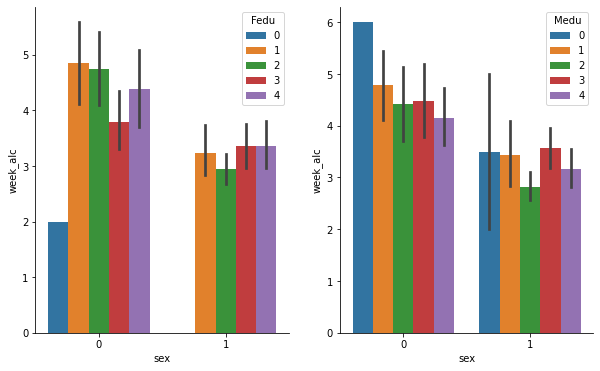

In [57]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="sex", y="week_alc", hue="Fedu", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="sex", y="week_alc", hue="Medu", data=df, orient = 'v', ax = ax[1])

### Var 9: Mjob 
**Student's mother's job category**
* 1 - at_home
* 2 - services
* 3 - teacher
* 4 - health
* 5 - other

Descriptive Statistics : 
 count    395.000000
mean       3.240506
std        1.523215
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Mjob, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.007015080471675171
Correlation with target alc consumption : 
 0.03924897400636403
Proportion of categories : 
 5    141
2    103
1     59
3     58
4     34
Name: Mjob, dtype: int64
percentage of data distrib : 
 5    0.356962
2    0.260759
1    0.149367
3    0.146835
4    0.086076
Name: Mjob, dtype: float64


,age,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Mjob,,,,,,,,,,,,,,,,,,,,,
1,16.966102,1.711864,2.118644,3.661017,2.559322,1.932203,1.694915,2.101695,0.423729,3.881356,3.016949,3.000000,1.389831,2.338983,3.271186,4.694915,10.457627,9.677966,9.152542,3.728814,0.169492
2,16.679612,2.844660,2.572816,3.320388,2.330097,1.854369,1.388350,2.029126,0.466019,4.029126,3.271845,3.135922,1.524272,2.281553,3.747573,6.019417,11.388350,11.213592,11.019417,3.805825,0.174757
3,16.517241,3.948276,3.293103,3.396552,2.293103,1.931034,1.362069,2.017241,0.051724,3.896552,3.448276,3.051724,1.568966,2.310345,3.534483,5.741379,11.534483,11.224138,11.051724,3.879310,0.189655
4,16.352941,3.647059,2.941176,3.882353,2.264706,1.735294,1.205882,2.000000,0.235294,3.764706,3.205882,3.323529,1.264706,2.382353,3.764706,4.558824,12.205882,12.352941,12.147059,3.647059,0.147059
5,16.751773,2.404255,2.234043,4.248227,2.106383,1.815603,1.482270,2.028369,0.340426,3.971631,3.219858,3.106383,1.503546,2.248227,3.489362,6.170213,10.177305,10.177305,9.822695,3.751773,0.212766


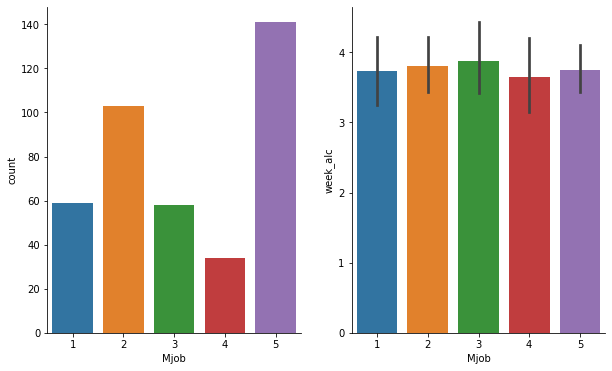

In [58]:
print("Descriptive Statistics :", '\n', df['Mjob'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Mjob'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Mjob'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Mjob.value_counts())
print("percentage of data distrib :", '\n', df.Mjob.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Mjob", data=df,  ax = ax[0])
sns.barplot(x="Mjob", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Mjob').mean()

### Var 10: Fjob 
**Student's father's job category**
* 1 - at_home
* 2 - services
* 3 - teacher
* 4 - health
* 5 - other

Descriptive Statistics : 
 count    395.000000
mean       3.762025
std        1.466747
min        1.000000
25%        2.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Fjob, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.016060447460670712
Correlation with target alc consumption : 
 -0.006156050356172467
Proportion of categories : 
 5    217
2    111
3     29
1     20
4     18
Name: Fjob, dtype: int64
percentage of data distrib : 
 5    0.549367
2    0.281013
3    0.073418
1    0.050633
4    0.045570
Name: Fjob, dtype: float64


,age,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Fjob,,,,,,,,,,,,,,,,,,,,,
1,17.150000,2.400000,2.350000,2.500000,2.150000,1.850000,1.200000,2.150000,0.400000,3.750000,3.550000,2.900000,1.400000,1.600000,3.450000,4.650000,11.700000,10.600000,10.150000,3.000000,0.100000
2,16.783784,2.693694,2.558559,2.864865,2.351351,1.774775,1.414414,2.045045,0.432432,4.018018,3.153153,3.090090,1.639640,2.477477,3.468468,5.873874,10.828829,10.882883,10.297297,4.117117,0.225225
3,16.379310,3.758621,3.862069,3.034483,2.482759,1.689655,1.482759,1.862069,0.137931,3.724138,3.241379,3.034483,1.482759,1.862069,3.655172,5.000000,12.896552,12.000000,11.965517,3.344828,0.103448
4,16.055556,3.166667,3.333333,3.111111,2.333333,1.666667,1.166667,2.500000,0.277778,3.888889,2.944444,3.000000,1.333333,1.888889,4.055556,5.555556,11.444444,11.388889,11.611111,3.222222,0.222222
5,16.705069,2.640553,2.271889,3.539171,2.211982,1.930876,1.506912,2.004608,0.308756,3.958525,3.271889,3.156682,1.419355,2.350230,3.552995,5.829493,10.566820,10.410138,10.193548,3.769585,0.184332


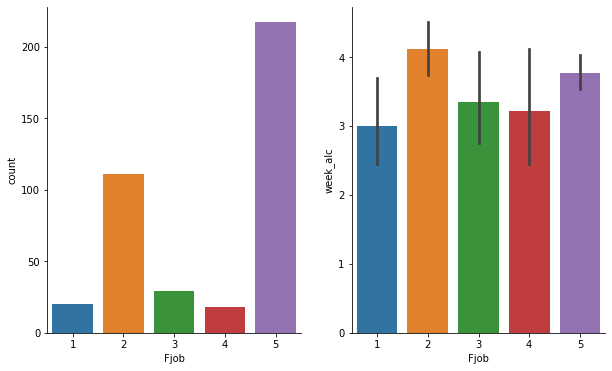

In [59]:
print("Descriptive Statistics :", '\n', df['Fjob'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Fjob'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Fjob'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Fjob.value_counts())
print("percentage of data distrib :", '\n', df.Fjob.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Fjob", data=df,  ax = ax[0])
sns.barplot(x="Fjob", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Fjob').mean()

<AxesSubplot:xlabel='sex', ylabel='week_alc'>

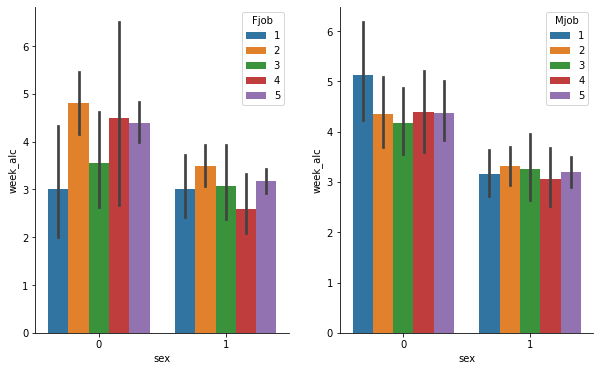

In [60]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="sex", y="week_alc", hue="Fjob", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="sex", y="week_alc", hue="Mjob", data=df, orient = 'v', ax = ax[1])

<AxesSubplot:xlabel='famsup', ylabel='week_alc'>

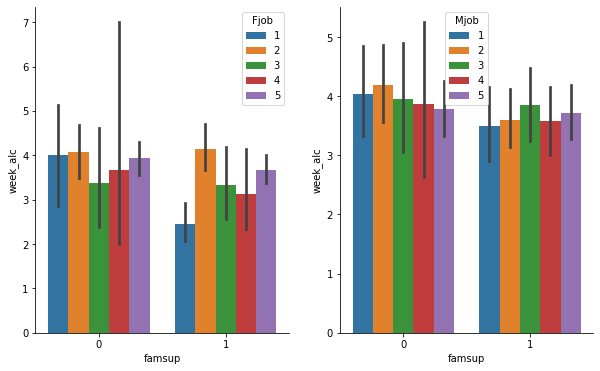

In [61]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="famsup", y="week_alc", hue="Fjob", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="famsup", y="week_alc", hue="Mjob", data=df, orient = 'v', ax = ax[1])

### Var 11: reason 
**Student's reason for choice of school**
* 1 - close to home
* 2 - school reputation
* 3 - course preference
* 4 - other

Descriptive Statistics : 
 count    395.000000
mean       2.273418
std        0.967060
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: reason, dtype: float64
Correlation with weekly alcohol consumption : 
 0.07486832382008016
Correlation with target alc consumption : 
 0.07233139972865175
Proportion of categories : 
 3    145
1    109
2    105
4     36
Name: reason, dtype: int64
percentage of data distrib : 
 3    0.367089
1    0.275949
2    0.265823
4    0.091139
Name: reason, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
reason,,,,,,,,,,,,,,,,,,,,,
1,16.733945,2.733945,2.504587,3.495413,3.761468,1.880734,1.357798,1.981651,0.385321,3.926606,3.100917,3.100917,1.513761,2.302752,3.550459,7.146789,10.816514,10.743119,10.256881,3.816514,0.192661
2,16.628571,2.942857,2.609524,3.428571,3.904762,1.847619,1.409524,2.304762,0.247619,3.942857,3.152381,3.038095,1.304762,2.114286,3.219048,6.647619,11.457143,11.257143,11.142857,3.419048,0.114286
3,16.689655,2.613793,2.482759,2.993103,3.758621,1.841379,1.544828,1.951724,0.365517,3.972414,3.365517,3.179310,1.475862,2.317241,3.793103,3.972414,10.600000,10.172414,9.820690,3.793103,0.206897
4,16.805556,2.777778,2.472222,2.916667,3.361111,1.833333,1.444444,1.750000,0.305556,3.888889,3.361111,3.055556,1.916667,2.666667,3.583333,5.611111,10.833333,11.222222,11.166667,4.583333,0.305556


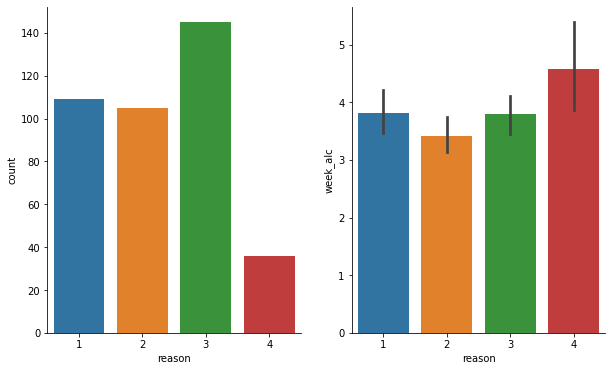

In [62]:
#Variable Reason: reason for choice of school
print("Descriptive Statistics :", '\n', df['reason'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['reason'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['reason'].corr(df['alc']))
print("Proportion of categories :", '\n', df.reason.value_counts())
print("percentage of data distrib :", '\n', df.reason.value_counts(normalize=True))

# 1=close to home, 2= school reputation, 3=course pref, 4 = other
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="reason", data=df,  ax = ax[0])
sns.barplot(x="reason", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'reason').mean()

### Var 12: guardian 
**Student's primary guardian**
* 1 - father
* 2 - mother
* 3 - other

Descriptive Statistics : 
 count    395.000000
mean       1.853165
std        0.536684
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: guardian, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.029111110471061723
Correlation with target alc consumption : 
 0.02258572928810696
Proportion of categories : 
 2    273
1     90
3     32
Name: guardian, dtype: int64
percentage of data distrib : 
 2    0.691139
1    0.227848
3    0.081013
Name: guardian, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
guardian,,,,,,,,,,,,,,,,,,,,,
1,16.433333,2.655556,2.744444,3.500000,3.333333,2.233333,1.488889,2.044444,0.277778,3.911111,3.211111,2.944444,1.533333,2.344444,3.700000,3.977778,11.111111,11.155556,10.688889,3.877778,0.177778
2,16.582418,2.831502,2.487179,3.157509,3.901099,2.322344,1.421245,2.021978,0.267399,3.937729,3.216117,3.168498,1.450549,2.296703,3.531136,5.835165,10.882784,10.677656,10.483516,3.747253,0.186813
3,18.406250,2.312500,2.187500,3.218750,3.781250,1.968750,1.562500,2.125000,1.062500,4.093750,3.468750,3.062500,1.593750,2.093750,3.343750,9.500000,10.562500,9.781250,9.062500,3.687500,0.218750


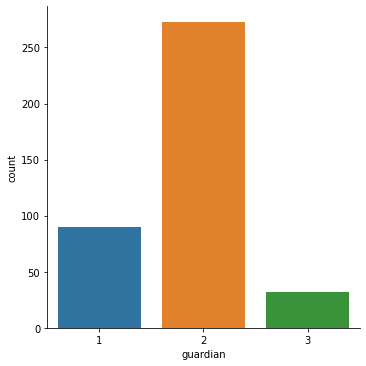

In [63]:
print("Descriptive Statistics :", '\n', df['guardian'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['guardian'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['guardian'].corr(df['alc']))
print("Proportion of categories :", '\n', df.guardian.value_counts())
print("percentage of data distrib :", '\n', df.guardian.value_counts(normalize=True))
sns.catplot(x="guardian", kind="count", data=df)
df.groupby(by= 'guardian').mean()

<AxesSubplot:xlabel='famsup', ylabel='week_alc'>

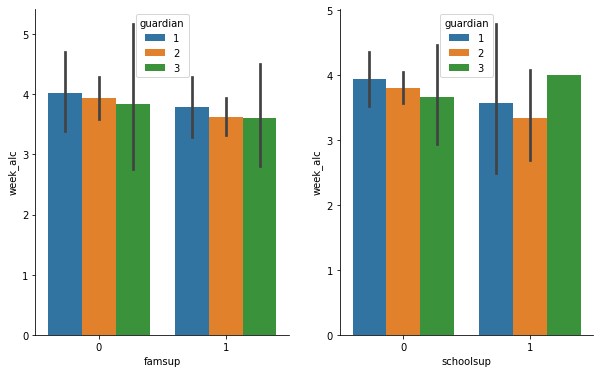

In [64]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="schoolsup", y="week_alc", hue="guardian", data=df, orient = 'v', ax = ax[1])
sns.barplot(x="famsup", y="week_alc", hue="guardian", data=df, orient = 'v', ax = ax[0])

### Var 13: traveltime 
**Student's traveltime between home to school**
* 1 - Less than  15 minutes
* 2 - 15 min to 30 min
* 3 - 30 min to 1 hr
* 4 - More than 1 hr

Descriptive Statistics : 
 count    395.000000
mean       1.448101
std        0.697505
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Correlation with weekly alcohol consumption : 
 0.14913368636424137
Correlation with target alc consumption : 
 0.12891007662309217
Proportion of categories : 
 1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
percentage of data distrib : 
 1    0.650633
2    0.270886
3    0.058228
4    0.020253
Name: traveltime, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
traveltime,,,,,,,,,,,,,,,,,,,,,
1,16.607004,2.852140,2.642023,3.260700,3.661479,2.229572,1.852140,2.081712,0.299611,3.980545,3.256809,3.116732,1.447471,2.256809,3.568093,5.677043,11.097276,11.058366,10.782101,3.704280,0.182879
2,16.869159,2.682243,2.336449,3.317757,3.943925,2.280374,1.850467,2.028037,0.355140,3.813084,3.205607,3.056075,1.420561,2.149533,3.495327,6.037383,10.644860,10.336449,9.906542,3.570093,0.121495
3,17.000000,2.173913,2.260870,2.782609,3.956522,2.652174,1.913043,1.565217,0.478261,4.130435,3.000000,2.956522,1.695652,2.695652,3.521739,4.956522,10.739130,9.565217,9.260870,4.391304,0.347826
4,16.375000,2.000000,1.875000,2.875000,4.000000,2.500000,1.750000,2.000000,0.750000,4.000000,3.625000,4.000000,2.750000,4.125000,4.000000,4.500000,8.875000,8.000000,8.750000,6.875000,0.750000


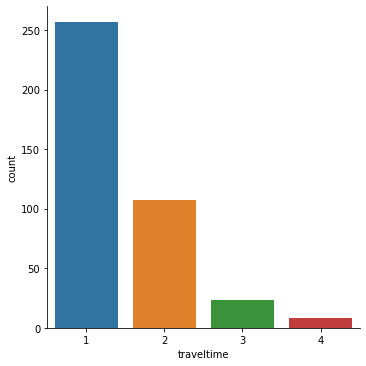

In [65]:
print("Descriptive Statistics :", '\n', df['traveltime'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['traveltime'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['traveltime'].corr(df['alc']))
print("Proportion of categories :", '\n', df.traveltime.value_counts())
print("percentage of data distrib :", '\n', df.traveltime.value_counts(normalize=True))
sns.catplot(x="traveltime", kind="count", data=df)
df.groupby(by= 'traveltime').mean()

### Var 14: studytime 
**Student's time spent studying in a week**
* 1 - Less than 2 hr
* 2 - 2 hrs to 5 hrs
* 3 - 5 hrs to 10 hrs
* 4 - More than 10 hrs

Descriptive Statistics : 
 count    395.000000
mean       2.035443
std        0.839240
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.25269787010746186
Correlation with target alc consumption : 
 -0.22156828286591532
Proportion of categories : 
 2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
percentage of data distrib : 
 2    0.501266
1    0.265823
3    0.164557
4    0.068354
Name: studytime, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
studytime,,,,,,,,,,,,,,,,,,,,,
1,16.647619,2.657143,2.438095,3.276190,3.742857,2.485714,1.809524,1.590476,0.523810,3.876190,3.438095,3.142857,1.761905,2.761905,3.800000,5.761905,10.438095,10.276190,10.047619,4.523810,0.333333
2,16.702020,2.737374,2.570707,3.287879,3.853535,2.166667,1.863636,1.414141,0.308081,3.934343,3.217172,3.176768,1.449495,2.267677,3.419192,6.277778,10.651515,10.505051,10.171717,3.717172,0.166667
3,16.923077,2.907692,2.676923,2.938462,3.461538,2.307692,1.969231,1.323077,0.230769,4.153846,3.092308,2.892308,1.200000,1.815385,3.723077,4.538462,12.046154,11.507692,11.400000,3.015385,0.046154
4,16.296296,2.814815,2.111111,3.481481,3.888889,2.148148,1.666667,1.444444,0.037037,3.777778,2.925926,3.000000,1.296296,1.777778,3.185185,4.148148,11.888889,12.037037,11.259259,3.074074,0.111111


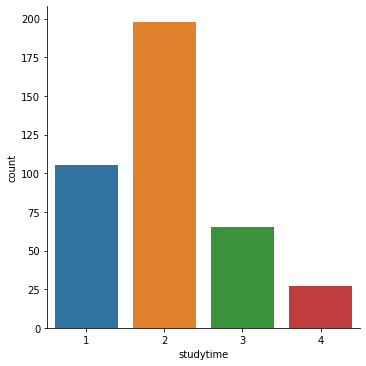

In [66]:
print("Descriptive Statistics :", '\n', df['studytime'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['studytime'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['studytime'].corr(df['alc']))
print("Proportion of categories :", '\n', df.studytime.value_counts())
print("percentage of data distrib :", '\n', df.studytime.value_counts(normalize=True))
sns.catplot(x="studytime", kind="count", data=df)
df.groupby(by= 'studytime').mean()

### Var 15: failures 
**Student's number of class failures**
* 0 - No classes failed in the past
* 1 - 1 class failed in the past
* 2 - 2 class failed in the past
* 3 - 3 class failed in the past
* 4 - 4 class failed in the past

Descriptive Statistics : 
 count    395.000000
mean       0.334177
std        0.743651
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Correlation with weekly alcohol consumption : 
 0.15320332600501813
Correlation with target alc consumption : 
 0.20329459398490776
Proportion of categories : 
 0    312
1     50
2     17
3     16
Name: failures, dtype: int64
percentage of data distrib : 
 0    0.789873
1    0.126582
2    0.043038
3    0.040506
Name: failures, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
failures,,,,,,,,,,,,,,,,,,,,,
0,16.506410,2.884615,2.647436,3.288462,3.820513,2.288462,1.807692,1.423077,2.102564,3.967949,3.198718,3.051282,1.416667,2.205128,3.490385,5.134615,11.467949,11.349359,11.253205,3.621795,0.150641
1,17.520000,2.260000,2.160000,3.080000,3.500000,2.180000,1.940000,1.460000,1.860000,3.920000,3.340000,3.240000,1.680000,2.500000,3.860000,9.420000,9.560000,9.260000,8.120000,4.180000,0.280000
2,16.941176,2.647059,2.411765,3.058824,3.588235,2.176471,2.176471,1.647059,1.882353,3.470588,3.058824,3.117647,1.764706,2.647059,3.705882,6.705882,8.352941,7.352941,6.235294,4.411765,0.294118
3,17.562500,1.750000,1.312500,3.000000,3.625000,2.375000,2.125000,1.687500,1.437500,4.062500,3.812500,3.812500,1.812500,2.937500,3.687500,4.250000,6.937500,6.437500,5.687500,4.750000,0.500000


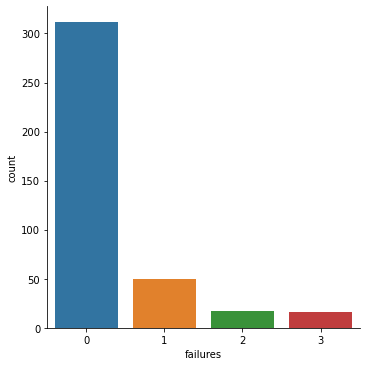

In [67]:
print("Descriptive Statistics :", '\n', df['failures'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['failures'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['failures'].corr(df['alc']))
print("Proportion of categories :", '\n', df.failures.value_counts())
print("percentage of data distrib :", '\n', df.failures.value_counts(normalize=True))
sns.catplot(x="failures", kind="count", data=df)
df.groupby(by= 'failures').mean()

### Var 16: schoolsup 
**Whether student gets xxtra educational suuport from school or not**

In [68]:
print("Descriptive Statistics :", '\n', df['schoolsup'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['schoolsup'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['schoolsup'].corr(df['alc']))
print("# of Students with extra educational support (1) :", df['schoolsup'].sum())
print("# of Students with no extra education support (0) :", df['schoolsup'].count() - df['schoolsup'].sum())
print("percentage of data distrib :", '\n', df.schoolsup.value_counts(normalize=True))
df.groupby(by= 'schoolsup').mean()

Descriptive Statistics : 
 count     395
unique      2
top         0
freq      344
Name: schoolsup, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 17: famsup 
**Whether student get educational support from family or not**

In [69]:
print("Descriptive Statistics :", '\n', df['famsup'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['famsup'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['famsup'].corr(df['alc']))
print("# of Students with extra educational support (1) :", df['famsup'].sum())
print("# of Students with no extra education support (0) :", df['famsup'].count() - df['schoolsup'].sum())
print("percentage of data distrib :", '\n', df.schoolsup.value_counts(normalize=True))
df.groupby(by= 'famsup').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      242
Name: famsup, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

<AxesSubplot:xlabel='famsup', ylabel='count'>

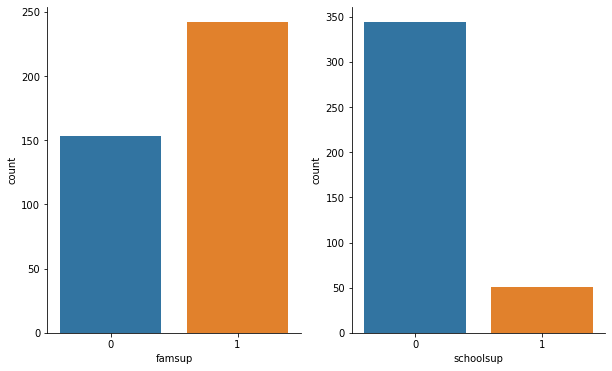

In [70]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="schoolsup", data=df,  ax = ax[1])
sns.countplot(x="famsup",  data=df,  ax = ax[0])

<AxesSubplot:xlabel='famsup', ylabel='week_alc'>

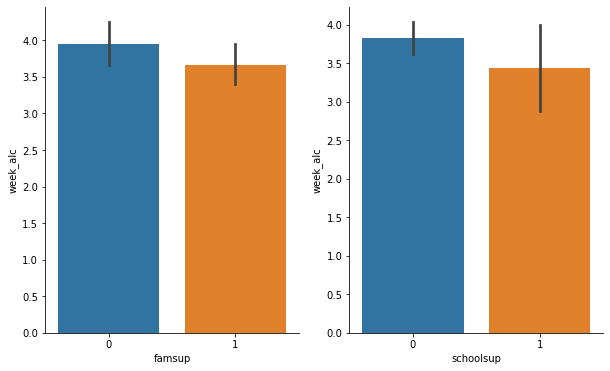

In [71]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="schoolsup",y = 'week_alc', data=df,  ax = ax[1])
sns.barplot(x="famsup", y = 'week_alc', data=df,  ax = ax[0])

### Var 18: paid 
**Whether the Student receives extra paid classes within the course**

In [72]:
print("Descriptive Statistics :", '\n', df['paid'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['paid'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['paid'].corr(df['alc']))
print("# of Students whose parents live together(1) :", df['paid'].sum())
print("# of Students whose parents live apart(0) :", df['paid'].count() - df['paid'].sum())
print("percentage of data distrib :", '\n', df.paid.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="paid", data=df,  ax = ax[0])
sns.barplot(x="paid", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'paid').mean()

Descriptive Statistics : 
 count     395
unique      2
top         0
freq      214
Name: paid, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 19: activities 
**Whether the Student participates in extra curricular activities or not**

In [73]:
# Variable student extra curricular activites
print("Descriptive Statistics :", '\n', df['activities'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['activities'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['activities'].corr(df['alc']))
print("# of Students participating in extra curr activities(1) :", df['activities'].sum())
print("# of Students not participating in extra curr activities(0) :", df['activities'].count() - df['activities'].sum())
print("percentage of data distrib :", '\n', df.activities.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="activities", data=df,  ax = ax[0])
sns.barplot(x="activities", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'activities').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      201
Name: activities, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

In [74]:
# Variable student extra curricular activites
print("Descriptive Statistics :", '\n', df['activities'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['activities'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['activities'].corr(df['alc']))
print("# of Students participating in extra curr activities(1) :", df['activities'].sum())
print("# of Students not participating in extra curr activities(0) :", df['activities'].count() - df['activities'].sum())
print("percentage of data distrib :", '\n', df.activities.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="activities", data=df,  ax = ax[0])
sns.barplot(x="activities", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'activities').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      201
Name: activities, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 20: nursery 
**Whether the Student attended nursery school or not**

In [75]:
# Variable student's attendance to nursery school
print("Descriptive Statistics :", '\n', df['nursery'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['nursery'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['nursery'].corr(df['alc']))
print("# of Students who attended nursery school(1) :", df['nursery'].sum())
print("# of Students who did not attended nursery school(0) :", df['nursery'].count() - df['nursery'].sum())
print("percentage of data distrib :", '\n', df.nursery.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="nursery", data=df,  ax = ax[0])
sns.barplot(x="nursery", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'nursery').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      314
Name: nursery, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 21: higher 
**Whether the student wants to take higher education classes or not**

In [76]:
# Variable students desiring to attend higher education
print("Descriptive Statistics :", '\n', df['higher'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['higher'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['higher'].corr(df['alc']))
print("# of Students who want to take higher education (1) :", df['higher'].sum())
print("# of Students who want to take higher education (0) :", df['higher'].count() - df['higher'].sum())
print("percentage of data distrib :", '\n', df.higher.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="higher", data=df,  ax = ax[0])
sns.barplot(x="higher", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'higher').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      375
Name: higher, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 22: internet 
**Whether the student has access to internet or not**

In [77]:
# Variable students access to internet
print("Descriptive Statistics :", '\n', df['internet'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['internet'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['internet'].corr(df['alc']))
print("# of Students who have internet access (1) :", df['internet'].sum())
print("# of Students who do not have internet access (0) :", df['internet'].count() - df['internet'].sum())
print("percentage of data distrib :", '\n', df.internet.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="internet", data=df,  ax = ax[0])
sns.barplot(x="internet", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'internet').mean()

Descriptive Statistics : 
 count     395
unique      2
top         1
freq      329
Name: internet, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 23: romantic 
**Whether the student is in a romantic relationship or not**

In [78]:
# Variable students in romantic relationship
print("Descriptive Statistics :", '\n', df['romantic'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['romantic'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['romantic'].corr(df['alc']))
print("# of Students in romantic relationship (1) :", df['romantic'].sum())
print("# of Students not in romatic relationship (0) :", df['romantic'].count() - df['romantic'].sum())
print("percentage of data distrib :", '\n', df.romantic.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="romantic", data=df,  ax = ax[0])
sns.barplot(x="romantic", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'romantic').mean()

Descriptive Statistics : 
 count     395
unique      2
top         0
freq      263
Name: romantic, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

### Var 24: famrel 
**Student's family relations quality**
* 1 very bad to 5 excellent

Descriptive Statistics : 
 count    395.000000
mean       3.944304
std        0.896659
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.10842656102734968
Correlation with target alc consumption : 
 -0.049836493952359937
Proportion of categories : 
 4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64
percentage of data distrib : 
 4    0.493671
5    0.268354
3    0.172152
2    0.045570
1    0.020253
Name: famrel, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
famrel,,,,,,,,,,,,,,,,,,,,,
1,16.375000,3.125000,2.750000,3.750000,4.000000,2.000000,1.875000,1.625000,2.250000,0.375000,2.500000,2.500000,1.875000,2.625000,2.750000,6.875000,10.750000,11.500000,10.625000,4.500000,0.250000
2,16.666667,3.055556,2.666667,3.277778,3.388889,2.777778,1.888889,1.500000,1.833333,0.555556,3.222222,3.500000,1.777778,2.611111,3.277778,6.000000,11.222222,11.222222,9.888889,4.388889,0.277778
3,16.558824,2.573529,2.382353,3.132353,3.808824,2.147059,1.705882,1.411765,1.911765,0.352941,2.955882,2.897059,1.455882,2.500000,3.382353,5.808824,10.558824,10.558824,10.044118,3.955882,0.205882
4,16.728205,2.733333,2.543590,3.220513,3.769231,2.256410,1.902564,1.451282,2.082051,0.312821,3.282051,3.117949,1.476923,2.266667,3.646154,6.010256,10.958974,10.676923,10.358974,3.743590,0.174359
5,16.754717,2.811321,2.528302,3.301887,3.764151,2.320755,1.849057,1.443396,2.047170,0.320755,3.386792,3.207547,1.424528,2.122642,3.603774,4.952830,11.000000,10.735849,10.830189,3.547170,0.179245


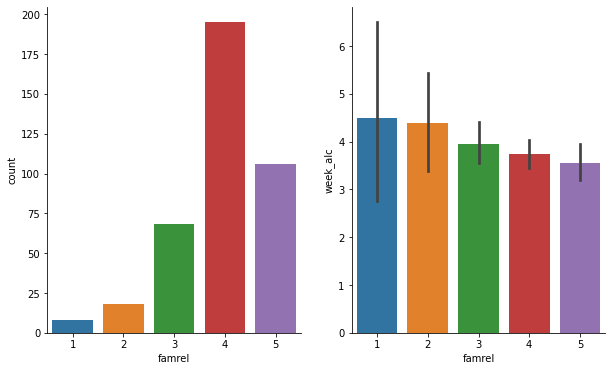

In [79]:
# Variable students quality of family relationship--- 1 very bad to 5 excellent
print("Descriptive Statistics :", '\n', df['famrel'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['famrel'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['famrel'].corr(df['alc']))
print("Proportion of categories :", '\n', df.famrel.value_counts())
print("percentage of data distrib :", '\n', df.famrel.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="famrel", data=df,  ax = ax[0])
sns.barplot(x="famrel", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'famrel').mean()

### Var 25: freetime 
**Amount of freetime the student has after school**
* 1 very low to 5 very high

Descriptive Statistics : 
 count    395.000000
mean       3.235443
std        0.998862
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Correlation with weekly alcohol consumption : 
 0.18975354724025523
Correlation with target alc consumption : 
 0.16635268291136143
Amount of freetime after school --- 1 very low to 5 very high
Proportion of categories : 
 3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64
percentage of data distrib : 
 3    0.397468
4    0.291139
2    0.162025
5    0.101266
1    0.048101
Name: freetime, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
freetime,,,,,,,,,,,,,,,,,,,,,
1,16.842105,2.526316,2.315789,3.263158,4.210526,1.578947,1.894737,1.473684,2.368421,0.368421,3.526316,2.315789,1.157895,1.842105,3.315789,10.947368,10.157895,10.421053,9.842105,3.000000,0.105263
2,16.734375,2.875000,2.609375,3.296875,3.515625,2.265625,1.781250,1.468750,2.062500,0.281250,3.734375,2.718750,1.281250,2.171875,3.437500,6.109375,12.046875,11.734375,11.562500,3.453125,0.140625
3,16.573248,2.656051,2.528662,3.121019,3.707006,2.292994,1.840764,1.439490,2.101911,0.261146,3.955414,3.031847,1.394904,2.191083,3.503185,4.808917,10.369427,10.280255,9.783439,3.585987,0.127389
4,16.800000,2.826087,2.539130,3.313043,3.965217,2.321739,1.895652,1.460870,2.000000,0.365217,4.078261,3.408696,1.626087,2.408696,3.686957,5.626087,10.834783,10.565217,10.426087,4.034783,0.260870
5,16.750000,2.800000,2.400000,3.400000,3.575000,2.400000,1.875000,1.400000,1.675000,0.600000,4.050000,3.550000,1.875000,2.750000,3.675000,6.350000,11.775000,11.350000,11.300000,4.625000,0.325000


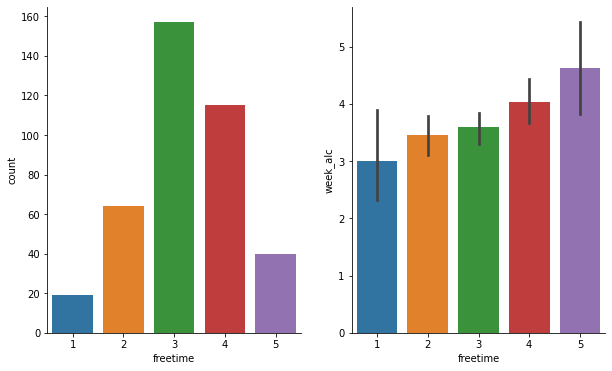

In [80]:
#Variable freetime == amount of freetime after school --- 1 very low to 5 very high
print("Descriptive Statistics :", '\n', df['freetime'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['freetime'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['freetime'].corr(df['alc']))
print("Amount of freetime after school --- 1 very low to 5 very high")
print("Proportion of categories :", '\n', df.freetime.value_counts())
print("percentage of data distrib :", '\n', df.freetime.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="freetime", data=df,  ax = ax[0])
sns.barplot(x="freetime", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'freetime').mean()

### Var 26: goout 
**Amount of time spent going out with friends**
* 1 very low to 5 very high

Descriptive Statistics : 
 count    395.000000
mean       3.108861
std        1.113278
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Correlation with weekly alcohol consumption : 
 0.39268293815918054
Correlation with target alc consumption : 
 0.36731173235909786
Going out with friends --- 1 very low to 5 very high
Proportion of categories : 
 3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64
percentage of data distrib : 
 3    0.329114
2    0.260759
4    0.217722
5    0.134177
1    0.058228
Name: goout, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
goout,,,,,,,,,,,,,,,,,,,,,
1,16.565217,2.739130,2.521739,2.956522,3.478261,2.478261,1.826087,1.652174,1.695652,0.347826,3.652174,3.000000,1.173913,1.608696,3.391304,6.913043,11.130435,10.782609,9.869565,2.782609,0.043478
2,16.398058,2.582524,2.388350,3.398058,3.815534,2.242718,1.815534,1.427184,2.135922,0.300971,3.902913,2.932039,1.310680,1.766990,3.747573,4.902913,11.368932,11.456311,11.194175,3.077670,0.077670
3,16.738462,2.830769,2.576923,3.123077,3.646154,2.207692,1.830769,1.384615,2.153846,0.200000,3.992308,3.115385,1.346154,2.107692,3.438462,5.492308,11.276923,11.053846,10.961538,3.453846,0.092308
4,16.953488,2.755814,2.593023,3.139535,3.883721,2.279070,1.930233,1.395349,1.953488,0.372093,3.965116,3.488372,1.616279,2.697674,3.453488,6.162791,10.430233,10.058140,9.651163,4.313953,0.290698
5,16.811321,2.867925,2.528302,3.509434,3.867925,2.396226,1.867925,1.641509,1.830189,0.660377,4.000000,3.811321,2.056604,3.396226,3.698113,6.547170,9.792453,9.471698,9.037736,5.452830,0.528302


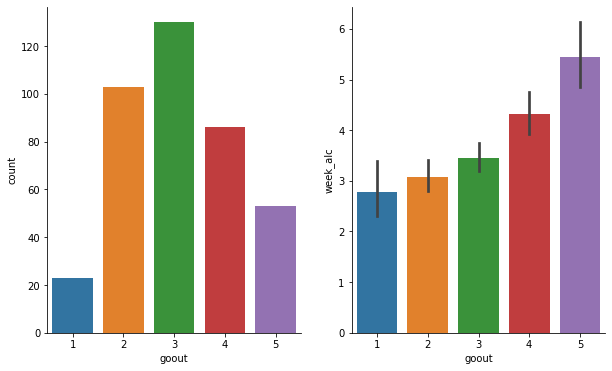

In [81]:
#Variable goout == Going out with friends --- 1 very low to 5 very high
print("Descriptive Statistics :", '\n', df['goout'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['goout'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['goout'].corr(df['alc']))
print("Going out with friends --- 1 very low to 5 very high")
print("Proportion of categories :", '\n', df.goout.value_counts())
print("percentage of data distrib :", '\n', df.goout.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="goout", data=df,  ax = ax[0])
sns.barplot(x="goout", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'goout').mean()

### Var 27: health 
**Student's current health status**
* 1 very bad to 5 very good

Descriptive Statistics : 
 count    395.000000
mean       3.554430
std        1.390303
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Correlation with weekly alcohol consumption : 
 0.09466236164645636
Correlation with target alc consumption : 
 0.10267035683984599
Student current health status --- 1 very bad to 5 very good
Proportion of categories : 
 5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64
percentage of data distrib : 
 5    0.369620
3    0.230380
4    0.167089
1    0.118987
2    0.113924
Name: health, dtype: float64


,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,G3,week_alc,alc
health,,,,,,,,,,,,,,,,,,,,,
1,16.574468,2.957447,2.531915,3.297872,3.659574,2.297872,1.914894,1.404255,2.000000,0.170213,3.829787,3.212766,3.170213,1.446809,2.106383,6.319149,11.702128,12.042553,11.872340,3.553191,0.170213
2,16.800000,2.955556,2.711111,3.066667,3.577778,2.044444,1.800000,1.444444,2.066667,0.266667,3.911111,3.222222,3.288889,1.400000,2.377778,5.955556,11.288889,11.111111,10.222222,3.777778,0.155556
3,16.923077,2.538462,2.318681,3.274725,3.846154,2.219780,1.945055,1.450549,2.197802,0.406593,3.813187,3.032967,2.857143,1.351648,2.065934,5.857143,10.604396,10.274725,10.010989,3.417582,0.109890
4,16.863636,2.742424,2.530303,3.303030,3.863636,2.257576,1.833333,1.530303,2.151515,0.333333,4.000000,3.257576,3.348485,1.530303,2.272727,5.045455,10.727273,10.378788,10.106061,3.803030,0.181818
5,16.486301,2.753425,2.582192,3.226027,3.753425,2.376712,1.801370,1.424658,1.883562,0.363014,4.047945,3.363014,3.082192,1.575342,2.472603,5.643836,10.808219,10.589041,10.397260,4.047945,0.253425


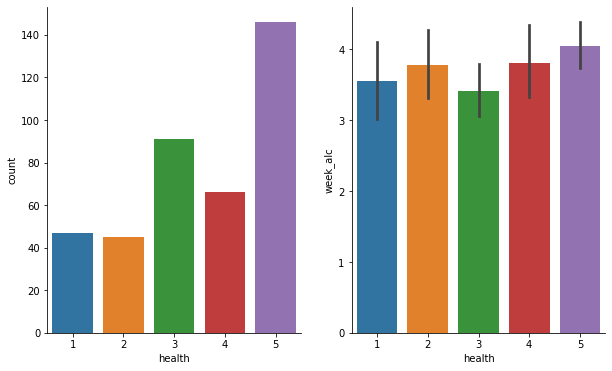

In [82]:
#Variable health == student current health status --- 1 very bad to 5 very good
print("Descriptive Statistics :", '\n', df['health'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['health'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['health'].corr(df['alc']))
print("Student current health status --- 1 very bad to 5 very good")
print("Proportion of categories :", '\n', df.health.value_counts())
print("percentage of data distrib :", '\n', df.health.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="health", data=df,  ax = ax[0])
sns.barplot(x="health", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'health').mean()

### Var 28: absences 
**Student's absences from school**
* 0 to 93

Descriptive Statistics : 
 count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64
Correlation with weekly alcohol consumption : 
 0.13868747915571564
Correlation with target alc consumption : 
 0.10272275349343103
Number of school absences ----- 0 to 93
percentage of data distrib : 
 0     0.291139
2     0.164557
4     0.134177
6     0.078481
8     0.055696
10    0.043038
14    0.030380
12    0.030380
3     0.020253
7     0.017722
16    0.017722
18    0.012658
5     0.012658
20    0.010127
22    0.007595
13    0.007595
1     0.007595
9     0.007595
11    0.007595
15    0.007595
23    0.002532
24    0.002532
21    0.002532
25    0.002532
56    0.002532
26    0.002532
28    0.002532
30    0.002532
17    0.002532
38    0.002532
40    0.002532
54    0.002532
19    0.002532
75    0.002532
Name: absences, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


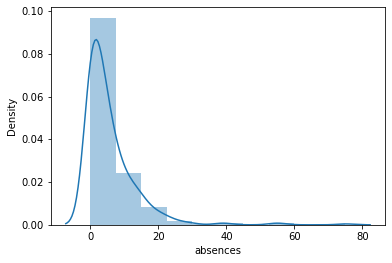

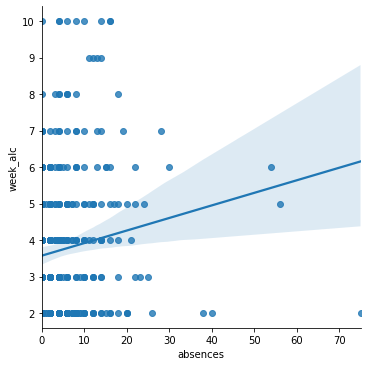

In [83]:
#Variable absences == Number of school absences ----- 0 to 93
print("Descriptive Statistics :", '\n', df['absences'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['absences'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['absences'].corr(df['alc']))
print("Number of school absences ----- 0 to 93")
print("percentage of data distrib :", '\n', df.absences.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["absences"],bins=10, kde=True, hist=True)
sns.lmplot(x="absences", y = 'week_alc', data=df)

### Var 29: G1 
**Student's first period grade**
* 0 to 20

Descriptive Statistics : 
 count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.12415754277848812
Correlation with target alc consumption : 
 -0.1414234495329687
Student first period grade --- 0 to 20
Proportion of categories : 
 10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
17     8
18     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64
percentage of data distrib : 
 10    0.129114
8     0.103797
11    0.098734
7     0.093671
12    0.088608
13    0.083544
9     0.078481
14    0.075949
15    0.060759
6     0.060759
16    0.055696
17    0.020253
18    0.020253
5     0.017722
19    0.007595
4     0.002532
3     0.002532
Name: G1, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


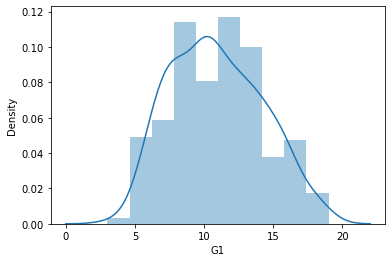

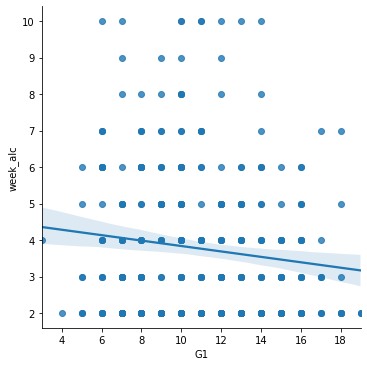

In [84]:
#Variable G1 == Student first period grade --- 0 to 20
print("Descriptive Statistics :", '\n', df['G1'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['G1'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['G1'].corr(df['alc']))
print("Student first period grade --- 0 to 20")
print("Proportion of categories :", '\n', df.G1.value_counts())
print("percentage of data distrib :", '\n', df.G1.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["G1"],bins=10, kde=True, hist=True)
sns.lmplot(x="G1", y = 'week_alc', data=df)

### Var 30: G2
**Student's second period grade**
* 0 to 20

Descriptive Statistics : 
 count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.08390094883952925
Correlation with target alc consumption : 
 -0.10851509158781812
Student second period grade --- 0 to 20
Proportion of categories : 
 9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
0     13
16    13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64
percentage of data distrib : 
 9     0.126582
10    0.116456
12    0.103797
13    0.093671
11    0.088608
15    0.086076
8     0.081013
14    0.058228
7     0.053165
5     0.037975
6     0.035443
0     0.032911
16    0.032911
18    0.030380
17    0.012658
19    0.007595
4     0.002532
Name: G2, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


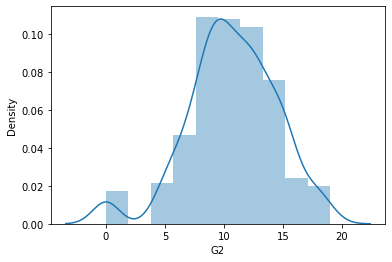

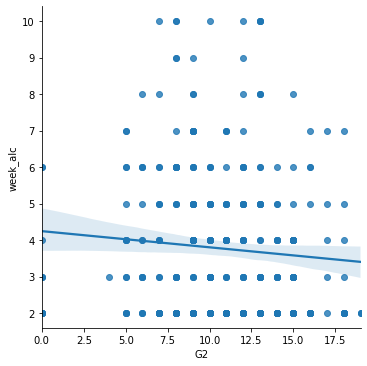

In [85]:
#Variable G1 == Student second period grade --- 0 to 20
print("Descriptive Statistics :", '\n', df['G2'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['G2'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['G2'].corr(df['alc']))
print("Student second period grade --- 0 to 20")
print("Proportion of categories :", '\n', df.G2.value_counts())
print("percentage of data distrib :", '\n', df.G2.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["G2"],bins=10, kde=True, hist=True)
sns.lmplot(x="G2", y = 'week_alc', data=df)

### Var 31: G3
**Student's third period grade**
* 0 to 20

Descriptive Statistics : 
 count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.058244839475609635
Correlation with target alc consumption : 
 -0.0747633199500541
Student first period grade --- 0 to 20
Proportion of categories : 
 10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64
percentage of data distrib : 
 10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
13    0.078481
12    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
4     0.002532
20    0.002532
Name: G3, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


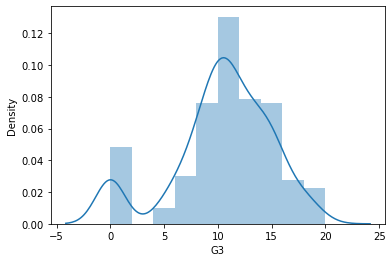

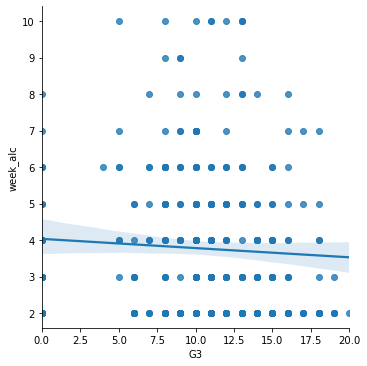

In [86]:
#Variable G1 == Student third period grade --- 0 to 20
print("Descriptive Statistics :", '\n', df['G3'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['G3'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['G3'].corr(df['alc']))
print("Student first period grade --- 0 to 20")
print("Proportion of categories :", '\n', df.G3.value_counts())
print("percentage of data distrib :", '\n', df.G3.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["G3"],bins=10, kde=True, hist=True)
sns.lmplot(x="G3", y = 'week_alc', data=df)

In [87]:
heavy = df.loc[df['alc'] == 1]
light = df.loc[df['alc'] == 0]
grades_heavy = df.grade_avg
grades_light = df.grade_avg

AttributeError: 'DataFrame' object has no attribute 'grade_avg'

In [88]:
plt.hist([grades_heavy,grades_light], bins = 30, stacked = True)
plt.xlabel('grade point average')
plt.ylabel('frequency')
plt.title('heavy drinkers & light drinkers GPA distributions')
plt.axvline(x = 10.5, color = 'k')
plt.axvline(x = 12.33, color = 'k')
plt.savefig('images/gpahist.png')
plt.show()

NameError: name 'grades_heavy' is not defined

### Var 32: week_alc
This variable was generated by transforming the `Dalc` and `Walc` variables. The `Dalc` variable denotes the level of alcohol consumption on a workday while the `Walc` variable denotes the level of alcohol consumption in the weekend. The sum of these two variables will tell us the level of alcohol consumption for a student for a week, combining workday + weekend. 
* 1 very low to 10 very high.

Descriptive Statistics : 
 count    395.000000
mean       3.772152
std        1.984389
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: week_alc, dtype: float64
Student total week alcohol consumption --- 1 very low to 10 very high
Proportion of categories : 
 2     150
3      66
4      60
5      45
6      35
7      17
10      9
8       9
9       4
Name: week_alc, dtype: int64
percentage of data distrib : 
 2     0.379747
3     0.167089
4     0.151899
5     0.113924
6     0.088608
7     0.043038
10    0.022785
8     0.022785
9     0.010127
Name: week_alc, dtype: float64


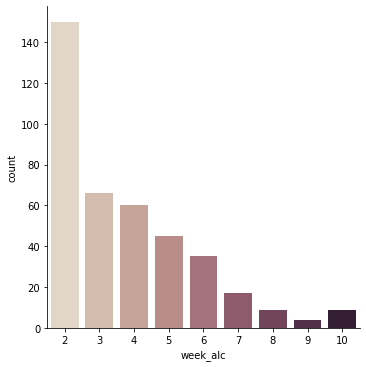

In [89]:
#Variable week_alc == student total week alcohol consumption --- 1 very low to 10 very high
print("Descriptive Statistics :", '\n', df['week_alc'].describe())
print("Student total week alcohol consumption --- 1 very low to 10 very high")
print("Proportion of categories :", '\n', df.week_alc.value_counts())
print("percentage of data distrib :", '\n', df.week_alc.value_counts(normalize=True))

sns.catplot(x="week_alc", kind="count", palette="ch:.25", data=df)



### Var 33: alc
This variable was generated by condensing the `week_alc` variable which gives the total level of alcohol consumption in a week. For level ranging from 1 to 5 has been binned as low level of alcohol consumption and range from 6 to 10 in a week has been binned as high level of alcohol consumption. Our end goal is to model what factors affect high levels of alcohol consumption in highschool students. Knowing the specific level does not give us any more information than the student having a high level of alcohol consumption.
* 0 very low
* 1 very high.

Descriptive Statistics : 
 count    395.000000
mean       0.187342
std        0.390680
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: alc, dtype: float64
# of Students who have high level of alcohol consumption (1) : 74
# of Students who have low level of alcohol consumption(0) : 321
percentage of data distrib : 
 0    0.812658
1    0.187342
Name: alc, dtype: float64


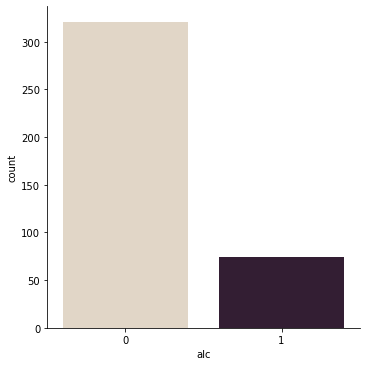

In [90]:
# Target Variable == Student Acohol Consumption Status --- 
print("Descriptive Statistics :", '\n', df['alc'].describe())
print("# of Students who have high level of alcohol consumption (1) :", df['alc'].sum())
print("# of Students who have low level of alcohol consumption(0) :", df['alc'].count() - df['alc'].sum())
print("percentage of data distrib :", '\n', df.alc.value_counts(normalize=True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
